# Analyze results

Here, we test the results of older versions of the code. Comparing NormalizedR0_LowBond and NormalizeBond

There are several metrics:

* Curvature at the top of the drop: $\kappa_T$
* Height of the drop: $H$
* Center of mass location of the drop $Z_{CM}$. Also compute the center of mass sag: $\delta$: it can be computed as $1-Z_{CM}/R_0$ or $2-H/R_0$
* Width of the drop: $W$ (note that in the file NormalizeBond/NormalizeBond.csv, half of the width is stored)
* Footprint of the drop: $R_{foot}$
* Taylor Deformation: $D_T$
* Perimeter of the drop: $P$
* Area of the drop: $A$

<img src="Schematic_Metrics.png" 
        alt="Picture" 
        width="600" 
        style="display: block; margin: 0 auto" />


### Word of caution

Sometimes it is useful to normalize everything with the gravito-capillary length. 

Consequently, following conversions are also important:

$$ \kappa_TR_0 = \tilde{\kappa_T}\sqrt{Bo} $$

$$ L_i/R_0 = \tilde{L_i}/\sqrt{Bo} $$

where $L_i$ are the different length scale metrics.

In [1]:
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})


### Read data

In [2]:
# both NormalizedR0_LowBond and NormalizeBond have data normalized by R0!
df0 = pd.read_csv('NormalizedR0_LowBond.csv')
df0 = df0.sort_values(by=['Bond'])
df0.head()
df = pd.read_csv('NormalizeBond.csv')
df.head()
KappaT, Bond, Height, Zcm, Width, Rfoot, P, A = df['KappaTR0'], df['Bond'], df['HbyR0'], df['ZcmbyR0'], df['WbyR0'], df['RWbyR0'], df['PbyR0'], df['AbyR02']
# make a dataframe with the new values so that they can be merged with df0
df = pd.DataFrame({'Bond':Bond, 'KappaT':KappaT, 'Height':Height, 'Zcm':Zcm, 'Width':Width, 'Rfoot':Rfoot, 'Perimeter':P, 'SurfaceArea':A})
#sort df based on Bond
df = df.sort_values(by=['Bond'])
df = df[df['Bond']>1e-2]

# stack the two dataframes one after the other
df = pd.concat([df0, df], axis=0)
# sort df based on Bond. If Bond is not unique, take the first value
df = df.sort_values(by=['Bond']).drop_duplicates(subset='Bond', keep='first')
df.head()


# data normalized by R0
KappaTR0, Bond, HbyR0, ZcmbyR0, WbyR0, RWbyR0, PbyR0, AbyR02 = df['KappaT'], df['Bond'], df['Height'], df['Zcm'], df['Width'], df['Rfoot'], df['Perimeter'], df['SurfaceArea']
# data normalized by gravito-capillary length
KappaT, Bond, Height, Zcm, Width, Rfoot, P, A = df['KappaT']/Bond**(0.5), df['Bond'], df['Height']*Bond**(0.5), df['Zcm']*Bond**(0.5), df['Width']*Bond**(0.5), df['Rfoot']*Bond**(0.5), df['Perimeter']*Bond**(0.5), df['SurfaceArea']*Bond

In [3]:
Bomin1, Bomin2, Bomax1, Bomax2 = 1e-8, 1e-3, 1e4, 1e3

## Curvature at the top of the drop: $\kappa_T$ vs Bond number $Bo$


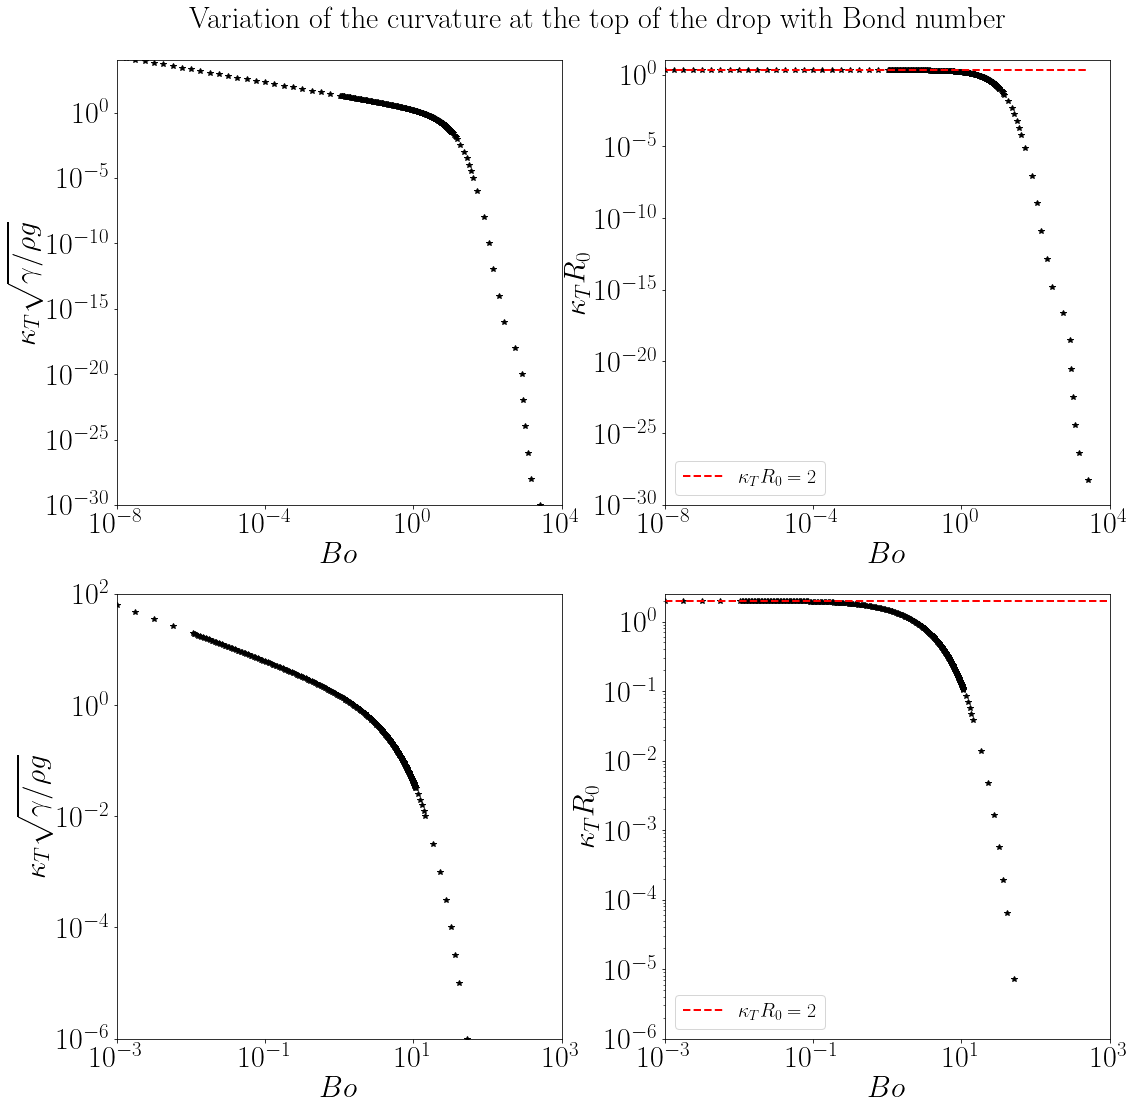

In [4]:
fig, AX = plt.subplots(2, 2, figsize=(18, 18))
ax1, ax2, ax3, ax4 = AX[0, 0], AX[0, 1], AX[1, 0], AX[1, 1]

ax=ax1
ax.plot(Bond, KappaT, 'k*')
ax.set_box_aspect(1)
ax.set_ylim([1e-30, 1e4])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\kappa_T\sqrt{\gamma/\rho g}$')

ax=ax2
ax.plot(Bond, KappaTR0, 'k*')
ax.plot(Bond, 2*Bond**0, 'r--', label=r'$\kappa_TR_0 = 2$', linewidth=2)
# ax.plot(Bond, 1e14*Bond**(-12), 'b--', label=r'$\kappa_T = 2$', linewidth=2)
ax.set_box_aspect(1)
ax.set_ylim([1e-30, 10])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\kappa_TR_0$')
ax.legend(loc='best', fontsize=20)

ax=ax3
ax.plot(Bond, KappaT, 'k*')
ax.set_box_aspect(1)
ax.set_ylim([1e-6, 1e2])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\kappa_T\sqrt{\gamma/\rho g}$')

ax=ax4
ax.plot(Bond, KappaTR0, 'k*')
ax.plot(Bond, 2*Bond**0, 'r--', label=r'$\kappa_TR_0 = 2$', linewidth=2)
# ax.plot(Bond, 1e4*Bond**(-5), 'b--', label=r'$\kappa_T = 2$', linewidth=2)
ax.set_box_aspect(1)
ax.set_ylim([1e-6, 2.5])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\kappa_TR_0$')
ax.legend(loc='lower left', fontsize=20)

# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the curvature at the top of the drop with Bond number', fontsize=AxesLabel, ha='center')
plt.savefig('Metrics/0_KappaTvsBond_v1.pdf', bbox_inches='tight')

## Height of the drop: $H$ vs Bond number $Bo$

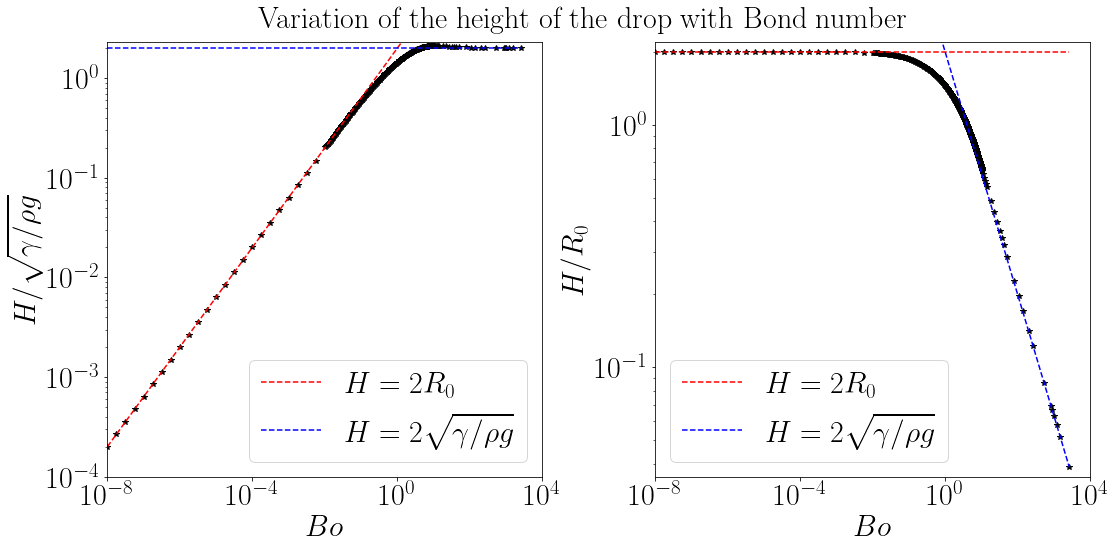

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax=ax1
ax.plot(Bond, Height, 'k*')
ax.plot(Bond, 2*(Bond**0.5), 'r--', label=r'$H = 2R_0$')
ax.plot(Bond, 2/(Bond**0.0), 'b--', label=r'$H = 2\sqrt{\gamma/\rho g}$')
ax.set_box_aspect(1)
ax.set_ylim([1e-4, Height.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$H/\sqrt{\gamma/\rho g}$')
ax.legend(loc='lower right')

ax=ax2
ax.plot(Bond, HbyR0, 'k*')
ax.plot(Bond, 2*(Bond**0.0), 'r--', label=r'$H = 2R_0$')
ax.plot(Bond, 2/(Bond**0.5), 'b--', label=r'$H = 2\sqrt{\gamma/\rho g}$')
ax.set_box_aspect(1)
ax.set_ylim([HbyR0.min()/1.1, HbyR0.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$H/R_0$')
ax.legend(loc='lower left')


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the height of the drop with Bond number', fontsize=AxesLabel, ha='center')
plt.savefig('Metrics/1_HeightvsBond_v1.pdf', bbox_inches='tight')

## Center of mass location of the drop $Z_{COM}$ vs Bond number $Bo$

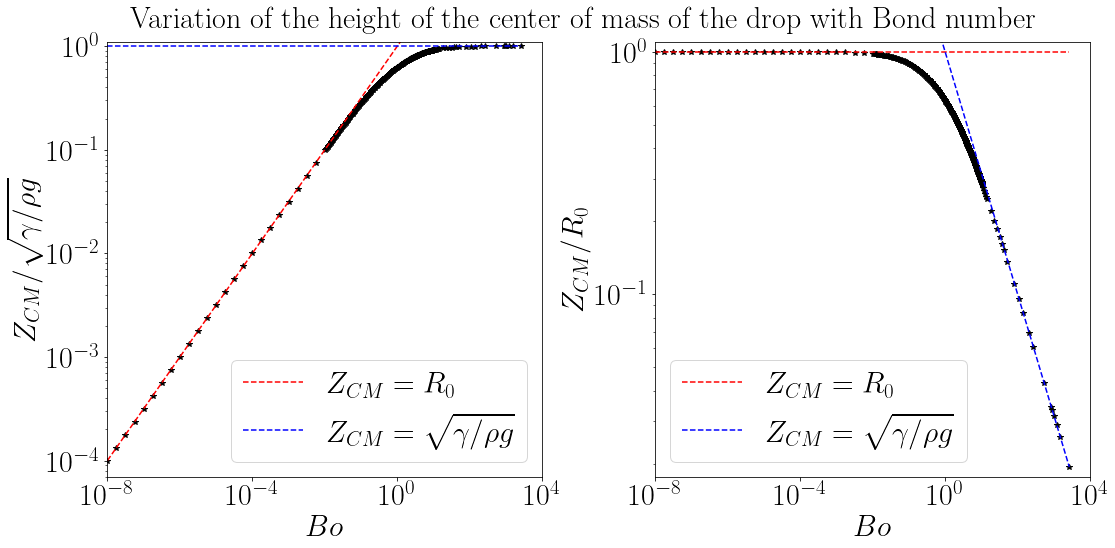

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax=ax1
ax.plot(Bond, Zcm, 'k*')
ax.plot(Bond, (Bond**0.5), 'r--', label=r'$Z_{CM} = R_0$')
ax.plot(Bond, 1/(Bond**0.0), 'b--', label=r'$Z_{CM} = \sqrt{\gamma/\rho g}$')
ax.set_box_aspect(1)
ax.set_ylim([7e-5, Zcm.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$Z_{CM}/\sqrt{\gamma/\rho g}$')
ax.legend(loc='lower right')

ax=ax2
ax.plot(Bond, ZcmbyR0, 'k*')
ax.plot(Bond, (Bond**0.0), 'r--', label=r'$Z_{CM} = R_0$')
ax.plot(Bond, 1/(Bond**0.5), 'b--', label=r'$Z_{CM} = \sqrt{\gamma/\rho g}$')
ax.set_box_aspect(1)
ax.set_ylim([ZcmbyR0.min()/1.1, ZcmbyR0.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$Z_{CM}/R_0$')
ax.legend(loc='lower left')


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the height of the center of mass of the drop with Bond number', fontsize=AxesLabel, ha='center')
plt.savefig('Metrics/2_HeightCOMvsBond_v1.pdf', bbox_inches='tight')

## Center of mass sag $\delta$ vs Bond number $Bo$

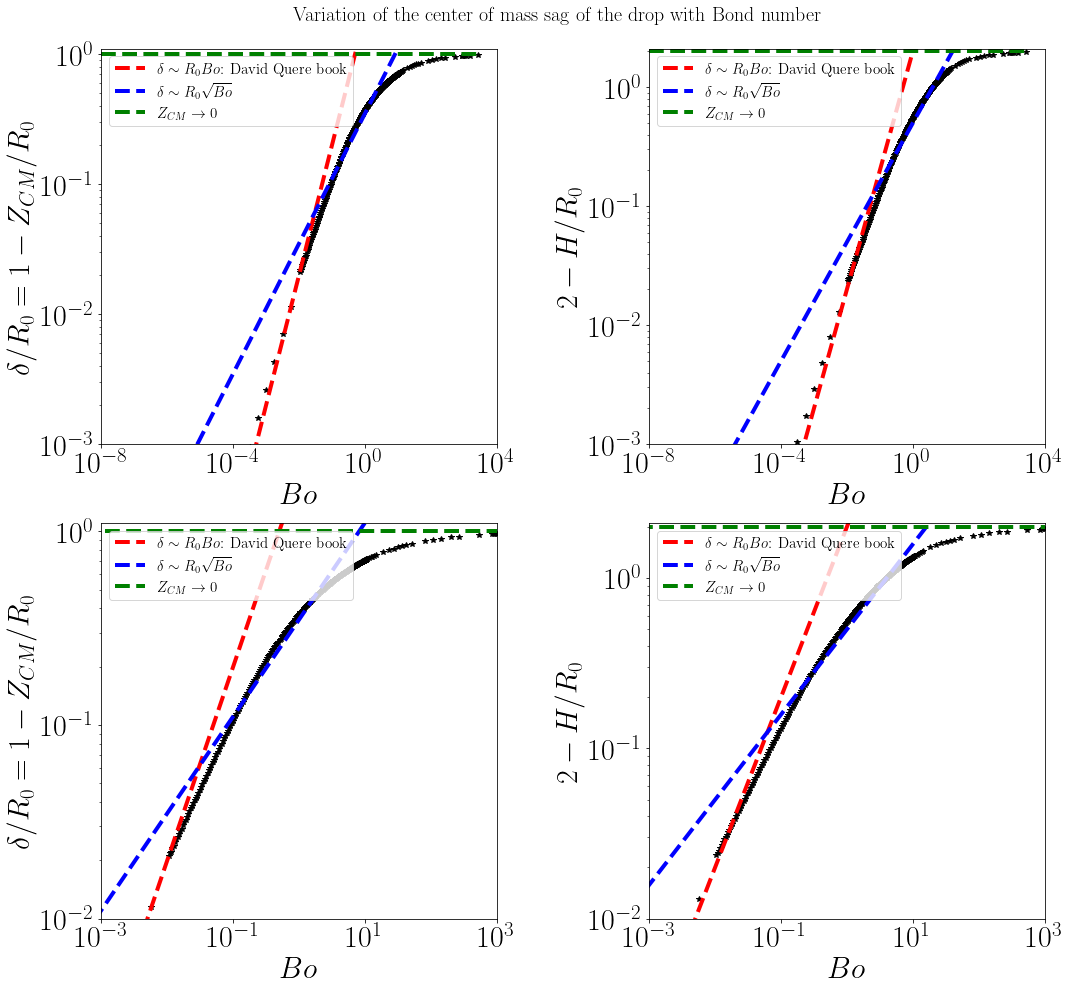

In [7]:
fig, AX = plt.subplots(2, 2, figsize=(18, 16))
ax1, ax2, ax3, ax4 = AX.flatten()

ax=ax1
ax.plot(Bond, 1-ZcmbyR0, 'k*')
ax.plot(Bond, 2*Bond, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.35*(Bond**0.5), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, (Bond**0.0), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([1e-3, 1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\delta/R_0 = 1-Z_{CM}/R_0$')
ax.legend(loc='upper left', fontsize=15)

ax=ax2
ax.plot(Bond, 2-HbyR0, 'k*')
ax.plot(Bond, 2*Bond, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.5*(Bond**0.5), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, 2*(Bond**0.0), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([1e-3, 2.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$2-H/R_0$')
ax.legend(loc='upper left', fontsize=15)

ax=ax3
ax.plot(Bond, 1-ZcmbyR0, 'k*')
ax.plot(Bond, 2*Bond, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.35*(Bond**0.5), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, (Bond**0.0), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([1e-2, 1.1])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$\delta/R_0 = 1-Z_{CM}/R_0$')
ax.legend(loc='upper left', fontsize=15)

ax=ax4
ax.plot(Bond, 2-HbyR0, 'k*')
ax.plot(Bond, 2*Bond, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.5*(Bond**0.5), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, 2*(Bond**0.0), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([1e-2, 2.1])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$2-H/R_0$')
ax.legend(loc='upper left', fontsize=15)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the center of mass sag of the drop with Bond number', fontsize=20, ha='center')
plt.savefig('Metrics/2_SagCOMvsBond_v1.pdf', bbox_inches='tight')

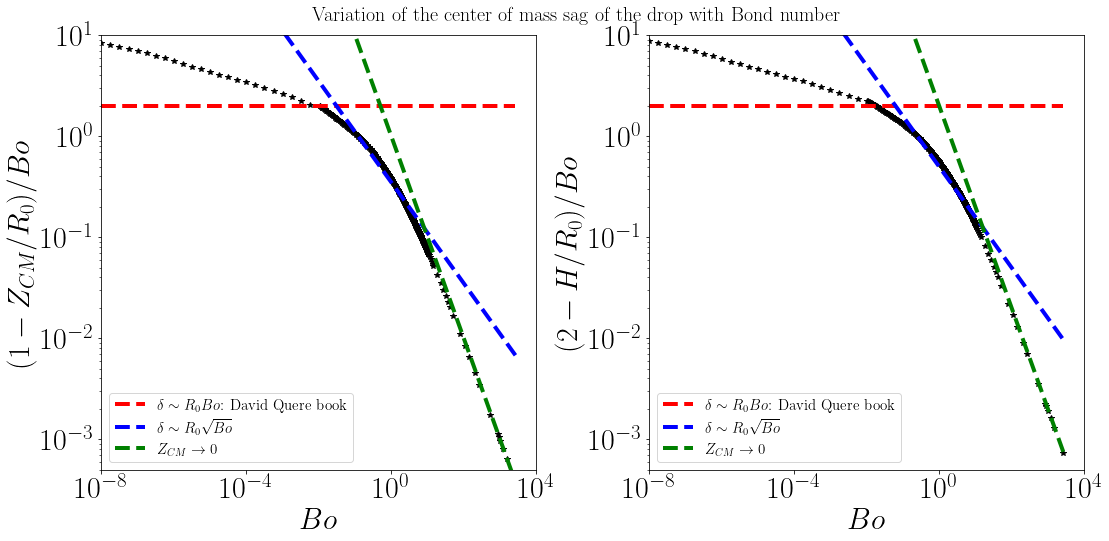

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax=ax1
ax.plot(Bond, (1-ZcmbyR0)/(Bond), 'k*')
ax.plot(Bond, 2*Bond**0, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.35*(Bond**(-0.5)), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, (Bond**(-1.0)), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([5e-4, 10.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$(1-Z_{CM}/R_0)/Bo$')
ax.legend(loc='lower left', fontsize=15)

ax=ax2
ax.plot(Bond, (2-HbyR0)/Bond, 'k*')
ax.plot(Bond, 2*Bond**0, 'r--', label=r'$\delta \sim R_0Bo$: David Quere book', linewidth=4)
ax.plot(Bond, 0.5*(Bond**(-0.5)), 'b--', label=r'$\delta \sim R_0\sqrt{Bo}$', linewidth=4)
ax.plot(Bond, 2*(Bond**(-1.0)), 'g--', label=r'$Z_{CM} \to 0$', linewidth=4)
ax.set_box_aspect(1)
ax.set_ylim([5e-4, 10.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$(2-H/R_0)/Bo$')
ax.legend(loc='lower left', fontsize=15)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the center of mass sag of the drop with Bond number', fontsize=20, ha='center')
plt.savefig('Metrics/2_SagCOMvsBond_compensated_v1.pdf', bbox_inches='tight')

Compensated plot does not look good.

## Half-width of the drop: $W$ vs Bond number $Bo$

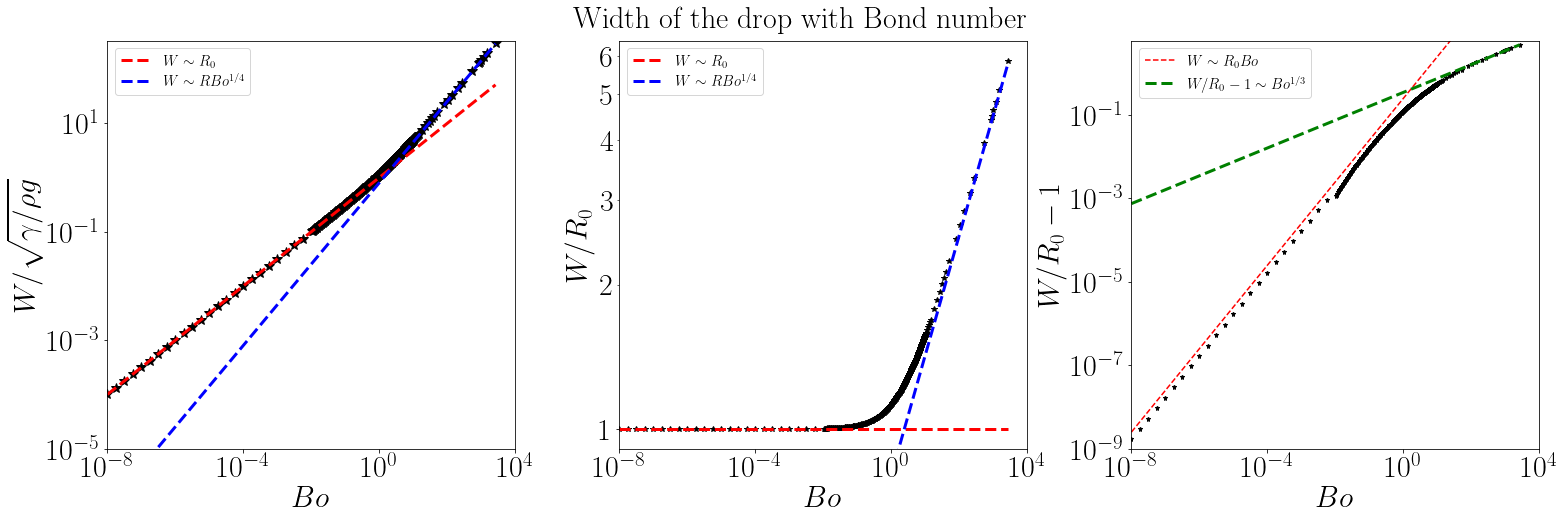

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 7.5))

ax=ax1
ax.plot(Bond, Width, 'k*',markersize=10)
ax.plot(Bond, (Bond**0.5), 'r--', label=r'$W \sim R_0$',linewidth=3)
ax.plot(Bond, 0.8*(Bond**0.75), 'b--', label=r'$W \sim RBo^{1/4}$',linewidth=3)
ax.set_box_aspect(1)
ax.set_ylim([1e-5, Width.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$W/\sqrt{\gamma/\rho g}$')
ax.legend(loc='upper left',fontsize=15)

ax=ax2
ax.plot(Bond, WbyR0, 'k*')
ax.plot(Bond, (Bond**0.0), 'r--', label=r'$W \sim R_0$',linewidth=3)
# ax.plot(Bond, 1+0.12*(Bond**0.5), 'b--', label=r'$W \sim \sqrt{\gamma/\rho g}$')
ax.plot(Bond, 0.8*(Bond**0.25), 'b--', label=r'$W \sim RBo^{1/4}$',linewidth=3)
ax.set_box_aspect(1)
ax.set_ylim([WbyR0.min()/1.1, WbyR0.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$W/R_0$')
ax.legend(loc='upper left',fontsize=15)
from matplotlib.ticker import StrMethodFormatter, NullFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:.0f}'))

ax=ax3
ax.plot(Bond, WbyR0-1, 'k*',markersize=5)
ax.plot(Bond, 0.25*(Bond), 'r--', label=r'$W \sim R_0Bo$')
ax.plot(Bond, 0.35*(Bond**(1/3)), 'g--', label=r'$W/R_0 - 1 \sim Bo^{1/3}$',linewidth=3)
# ax.plot(Bond, 0.8*(Bond**0.25), 'b--', label=r'$W \sim RBo^{1/4}$')
ax.set_box_aspect(1)
ax.set_ylim([1e-9, 6])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$W/R_0-1$')
ax.legend(loc='upper left',fontsize=15)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Width of the drop with Bond number', fontsize=AxesLabel, ha='center')
plt.savefig('Metrics/3_WidthvsBond_v1.pdf', bbox_inches='tight')

## Footprint of the drop: $R_{foot}$ vs Bond number $Bo$

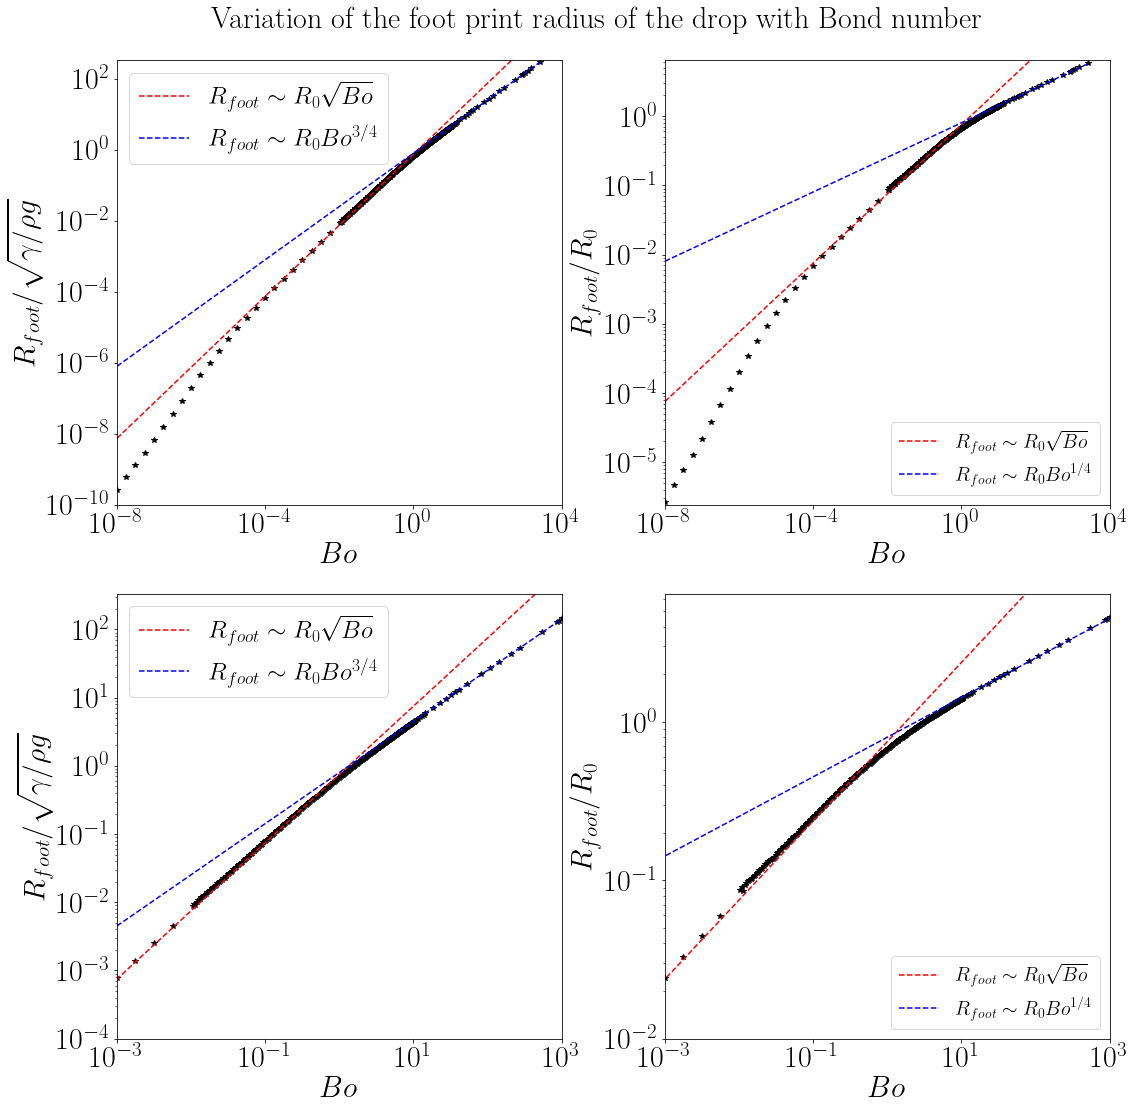

In [10]:
fig, Ax = plt.subplots(2, 2, figsize=(18, 18))
ax1, ax2, ax3, ax4 = Ax.flatten()

ax=ax1
ax.plot(Bond, Rfoot, 'k*')
ax.plot(Bond, 0.75*(Bond), 'r--', label=r'$R_{foot} \sim R_0\sqrt{Bo}$')
ax.plot(Bond, 0.8*(Bond**0.75), 'b--', label=r'$R_{foot} \sim R_0Bo^{3/4}$')
ax.set_box_aspect(1)
ax.set_ylim([1e-10, Rfoot.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$R_{foot}/\sqrt{\gamma/\rho g}$')
ax.legend(loc='upper left',fontsize=25)

ax=ax2
ax.plot(Bond, RWbyR0, 'k*')
ax.plot(Bond, 0.75*(Bond**0.5), 'r--', label=r'$R_{foot} \sim R_0\sqrt{Bo}$')
ax.plot(Bond, 0.8*(Bond**0.25), 'b--', label=r'$R_{foot} \sim R_0Bo^{1/4}$')
ax.set_box_aspect(1)
ax.set_ylim([RWbyR0.min()/1.1, RWbyR0.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$R_{foot}/R_0$')
ax.legend(loc='lower right', fontsize=20)

ax=ax3
ax.plot(Bond, Rfoot, 'k*')
ax.plot(Bond, 0.75*(Bond), 'r--', label=r'$R_{foot} \sim R_0\sqrt{Bo}$')
ax.plot(Bond, 0.8*(Bond**0.75), 'b--', label=r'$R_{foot} \sim R_0Bo^{3/4}$')
ax.set_box_aspect(1)
ax.set_ylim([1e-4, Rfoot.max()*1.1])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$R_{foot}/\sqrt{\gamma/\rho g}$')
ax.legend(loc='upper left',fontsize=25)

ax=ax4
ax.plot(Bond, RWbyR0, 'k*')
ax.plot(Bond, 0.75*(Bond**0.5), 'r--', label=r'$R_{foot} \sim R_0\sqrt{Bo}$')
ax.plot(Bond, 0.8*(Bond**0.25), 'b--', label=r'$R_{foot} \sim R_0Bo^{1/4}$')
ax.set_box_aspect(1)
ax.set_ylim([1e-2, RWbyR0.max()*1.1])
ax.set_xlim([Bomin2, Bomax2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$R_{foot}/R_0$')
ax.legend(loc='lower right', fontsize=20)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the foot print radius of the drop with Bond number', fontsize=AxesLabel, ha='center')
plt.savefig('Metrics/4_FootprintvsBond_v1.pdf', bbox_inches='tight')

## Taylor deformation: $D_T$ vs Bond number $Bo$

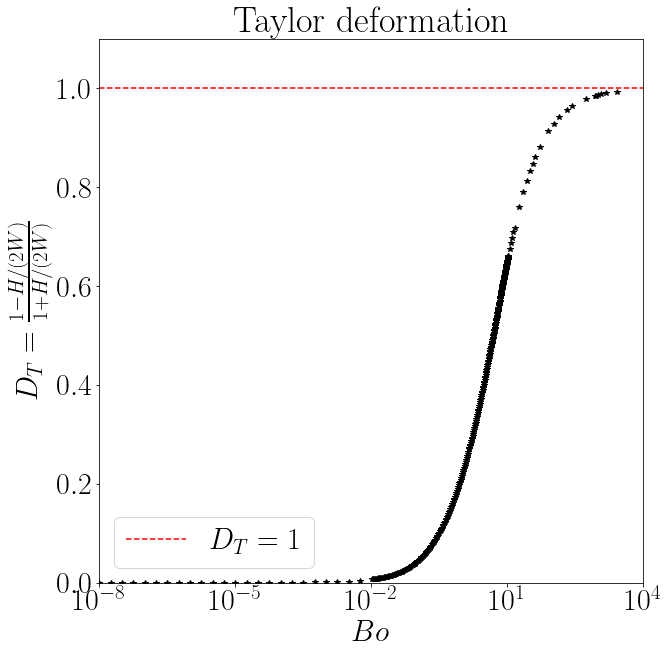

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

DT = (1 - Height/(2*Width))/(1 + Height/(2*Width))

ax=ax1
ax.plot(Bond, DT, 'k*')
ax.plot([Bond.min(), 1e6], [1, 1], 'r--', label=r'$D_T = 1$')
ax.set_box_aspect(1)
ax.set_ylim([0.0, 1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$D_T = \frac{1-H/(2W)}{1+H/(2W)}$')
ax.legend(loc='best')
ax.set_title(r'Taylor deformation')
plt.savefig('Metrics/5_TaylorDeformationvsBond_v1.pdf', bbox_inches='tight')

## Perimeter: $P$ vs Bond number $Bo$

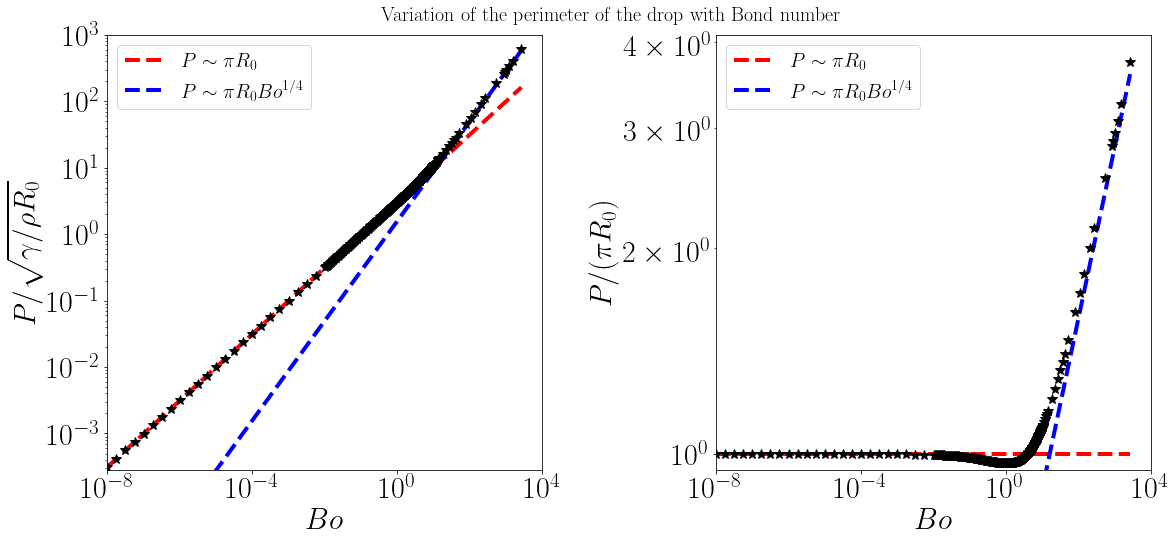

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax=ax1
ax.plot(Bond, pi*Bond**0.5, 'r--', label=r'$P \sim \pi R_0$', linewidth=4)
ax.plot(Bond, 0.5*pi*(Bond**(3/4)), 'b--', label=r'$P \sim \pi R_0Bo^{1/4}$', linewidth=4)
ax.plot(Bond, P, 'k*', markersize=10)
ax.set_box_aspect(1)
ax.set_ylim([P.min()/1.1, 1e3]) #P.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$P/\sqrt{\gamma/\rho R_0}$')
ax.legend(loc='upper left', fontsize=20)

ax=ax2
ax.plot(Bond, Bond**0, 'r--', label=r'$P \sim \pi R_0$', linewidth=4)
ax.plot(Bond, 0.5*(Bond**(1/4)), 'b--', label=r'$P \sim \pi R_0Bo^{1/4}$', linewidth=4)
ax.plot(Bond, PbyR0/pi, 'k*', markersize=10)
ax.set_box_aspect(1)
ax.set_ylim([0.95, 4.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$P/(\pi R_0)$')
ax.legend(loc='upper left', fontsize=20)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the perimeter of the drop with Bond number', fontsize=20, ha='center')
plt.savefig('Metrics/6_PerimetervsBond_v1.pdf', bbox_inches='tight')

## Surface Area: $A$ vs Bond number $Bo$

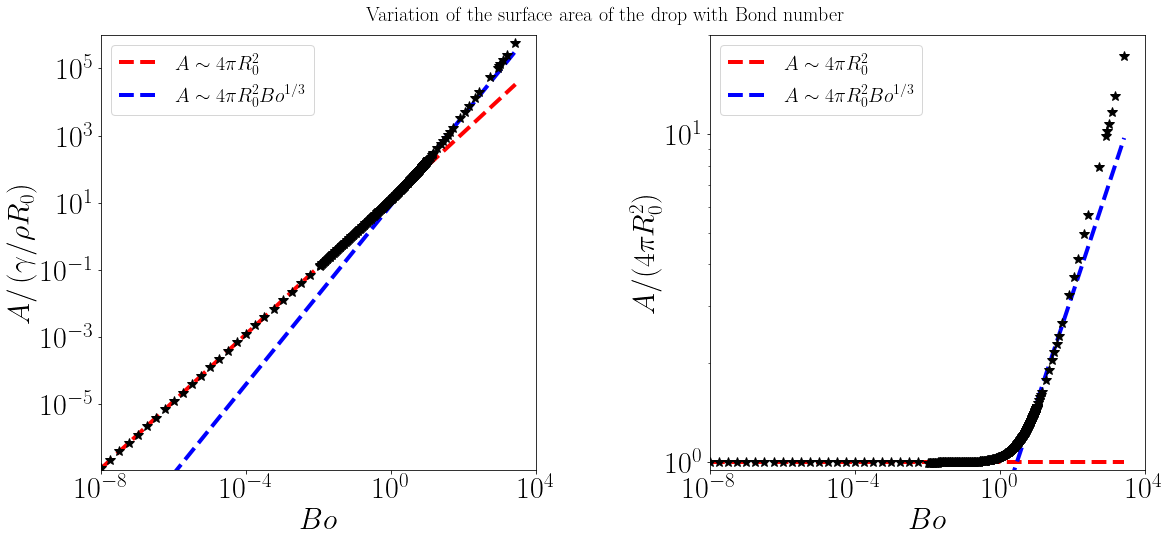

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax=ax1
ax.plot(Bond, (4*pi)*Bond, 'r--', label=r'$A \sim 4 \pi R_0^2$', linewidth=4)
ax.plot(Bond, 0.7*(4*pi)*(Bond**(4/3)), 'b--', label=r'$A \sim 4 \pi R_0^2Bo^{1/3}$', linewidth=4)
ax.plot(Bond, A, 'k*', markersize=10)
ax.set_box_aspect(1)
ax.set_ylim([A.min()/1.1, 1e6]) #P.max()*1.1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$A/\left(\gamma/\rho R_0\right)$')
ax.legend(loc='upper left', fontsize=20)

ax=ax2
ax.plot(Bond, Bond**0, 'r--', label=r'$A \sim 4 \pi R_0^2$', linewidth=4)
ax.plot(Bond, 0.7*(Bond**(1/3)), 'b--', label=r'$A \sim 4 \pi R_0^2Bo^{1/3}$', linewidth=4)
ax.plot(Bond, AbyR02/(4*pi), 'k*', markersize=10)
ax.set_box_aspect(1)
ax.set_ylim([0.95, 2e1])
ax.set_xlim([Bomin1, Bomax1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Bo$')
ax.set_ylabel(r'$A/(4\pi R_0^2)$')
ax.legend(loc='upper left', fontsize=20)


# set figure title
l1, b1, w1, h1 = ax1.get_position().bounds
l2, b2, w2, h2 = ax2.get_position().bounds

L = max(b1+h1, b2+h2)
# set title position
fig.text(0.5, L+0.025, r'Variation of the surface area of the drop with Bond number', fontsize=20, ha='center')
plt.savefig('Metrics/7_AreavsBond_v1.pdf', bbox_inches='tight')